<a href="https://colab.research.google.com/github/putrinurifa/PCVK_Genap_2022/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PUTRI NURIFA FIRDAUSIA**

**1941720036** 

**TI-3G**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**MEMBUAT CONVOLUTION**

In [4]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)
  
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1
  
  new_image = np.zeros((output_height, output_width)).astype(np.float32)
  
  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

**LOAD IMAGE AND CHANGE TO GRAYSCALE**

In [5]:
img_m = cv.imread('/content/drive/MyDrive/PCVK_PUTRINURIFAFIRDAUSIA/Images/mandrill.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

**MENENTUKAN KERNEL DAN MEMANGGIL FUNGSI CONVOLUTION**

**SHARPEN**

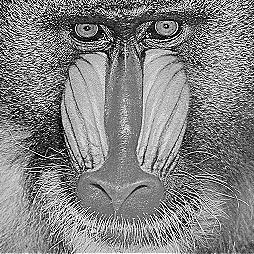

In [6]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen,1,0))

**EMBOSS**

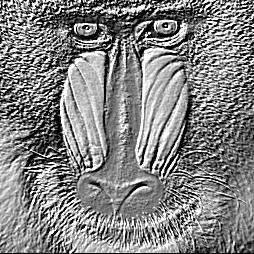

In [7]:
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, emboss,1,0))

**LEFT** **SOBEL** **EDGE** **DETECTION**

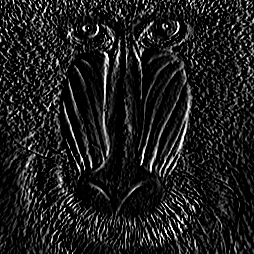

In [8]:
leftsobeledge = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, leftsobeledge,1,0))

**CANNY EDGE DETECTION**

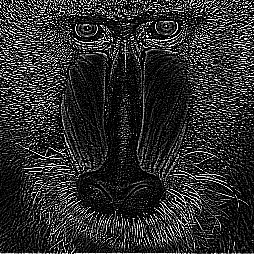

In [9]:
cannyedge = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, cannyedge,1,0))

**21 x 21 GUASSIAN BLUR**

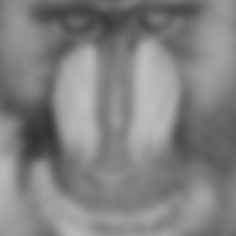

In [10]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
guassian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = guassian_kernel @guassian_kernel.transpose()
cv2_imshow(convolution2d(img_gray, gauss_kernel,1,0))